<div align = 'center'>
    <font size=20> 钱院学辅--计学组联合开展 </font>
<div/>
        
<table rules="none" align="center">
		<td>
			<center>
				<img src="img/logo2.png" width="100%" />
			</center>
		</td>
		<td>
			<center>
				<img src="img/logo.png" width="100%" />
			</center>
		</td>
</table>


<div align = 'center'>
    <font size=40> 前言 </font>
</div>
    欢迎各位同学参加本次机器学习讨论班！在过去的十几年内，机器学习领域不断发展，完善，使得其在人工智能各个领域都取得了巨大突破，引来了数不胜数的学者、工程师进行开发研究。也正是在这火热的背景下，我和几位计学组的同学联合钱院学辅开展了机器学习讨论班，希望与大家从最传统的模型开始，一起学习进步。同时，这不仅仅是我们组织者建立的讨论班，而是所有参与同学一同创立并维护的交流平台。因此大家可以彼此交流意见，改善不合理之处，一同打造一个更好的学习讨论班。我们也诚挚地希望，讨论班能够一直办下去，甚至成为钱院学辅的一大招牌，这需要所有同学的共同努力，希望大家多多支持！
    
参与组织的同学有 
- 计试2201 成崔昊     
- 计试2201 李垦
- 计试2201 林泽锂
- 计试2101 杨思成

最后再次感谢以上组织的同学，感谢计学组与钱院学辅对本次活动的支持。
<div align = 'right'>
    <font size=8> 钱院学辅·计学组 </font>
    <br>
    <font size=8> 2023年10月20日 </font>
</div>
    

# <center> 第一次讨论课 </center>
# <center>机器学习基本概念，知识补充，感知机</center>


## 关于讨论班
### 内容安排：
- （1）机器学习基本概念，知识补充，感知机
- （2）Logistic回归，最大熵模型
- （3）knn，朴素贝叶斯
- （4）决策树
- （5）SVM
- （6）boosting & bagging
- （7）...



*我们会根据主讲同学意愿，之后日程安排会有一定调整，学期末最后几次可能会邀请学长为大家介绍较为前沿的深度学习引用，\
所以也可能会在这之前安排深度学习基础。想要当主讲人的同学可以提前一周左右联系我或者群里的管理员，\
可以不讲上述安排的内容~~（夹带私货）~~，只要贴合主题即可*\
~~而且还可以赚工时~~

![](img/history1.png)

![](img/history2.png)

![](img/history3.png)

![](img/history4.png)

## 机器学习基本概念

### 分类

- 监督学习

>指给定**标注数据**后学习预测模型的机器学习问题，例如：分类，回归。

其学习过程可以概括为：\
从给定有限的训练数据出发， 假设数据是独立同分布的，而且假设模型属于某个假设空间(即模型的集合)，应用某一评价准则，从假设空间中选取一个最优的模型，使它对已给训练数据及未知测试数据在给定评价标准意义下有最准确的预测。



!['监督学习'](img/supervised_learning.png)

- 无监督学习
> 从无数据标注中学习预测模型的机器学习问题，例如：聚类，降维。

- 强化学习
> 智能系统与环境的连续作用下学习最优行为。

- 半监督和主动学习
> 利用部分标注与更多的无标注数据进行学习预测。



## 误差与损失函数


一般，我们把误差函数定义为一个二元函数$L(y,\hat{y})$,其中$\hat{y}$表示真实值y的预测值\
假设学到的模型为$Y = \hat{f}(X)$\
我们得到的训练集上的平均误差为<center>$R_{emp}(\hat f) = \frac{1}{N}\sum\limits_{i=0}^N L(y_i,\hat{f}(x_i))$</center>


不过我们更关心的是测试集上的误差，这代表了一个模型经过学习之后的泛化能力，（是否能够适应全新的数据）

---

### 均方误差（Mean Square Error）

它衡量了预测值与真实值之间的差异，并将差异的平方作为损失的度量:
<center>$L(y,\hat{y}) = (y-\hat{y})^2$(有时候会再乘1/2)</center>
性质：非负，平滑，对噪音敏感

常用于回归问题

下面来看一个应用实例:



    
假设现存在一组数据，其满足函数 $y=sin2{\pi}x$， 同时数据中加上一个正态分布的噪音干扰\
我们用多项式函数，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$去拟合它，现得到一组系数$w = (w_0,w_1,w_2,...,w_n)$
 
## 思考：
    
> 如何去评价这组系数（这个模型）的好坏？
    

我们利用平方损失函数，$L(w) = \frac{1}{2}\sum\limits_{i=0}^N  (y_i - H(x_i))^2$\
希望找到一个w，使得模型的损失**最小**，这就是最终预期的模型 $w = \arg\min\limits_{w} L(w)$

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [5]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
def add_noise(x,sigma):
    return x + np.random.normal(0, sigma,size=(x.shape))
y_ = real_func(x)
y = add_noise(y_, 0.1)

def MSE(y, y_hat):
    return np.mean((y-y_hat)**2/2)

def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    print('train loss:',MSE(y, fit_func(p_lsq[0], x)))
    print('test loss:', MSE(add_noise(real_func(x),0.3),fit_func(p_lsq[0], x)))
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.02283844]
train loss: 0.24438105189869014
test loss: 0.2026281594755956


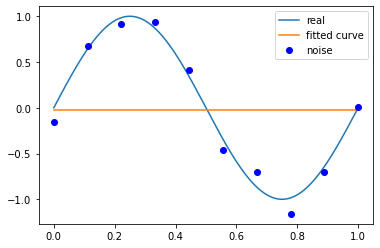

In [6]:
# M=0
p_lsq_0 = fitting(M=0)


Fitting Parameters: [-1.32588981  0.64010647]
train loss: 0.15485409816820378
test loss: 0.2384095609075832


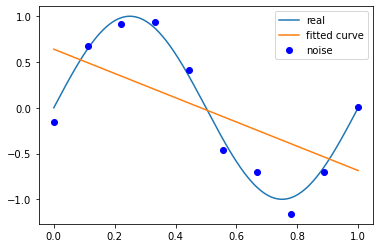

In [7]:
# M=1
p_lsq_1 = fitting(M=1)


Fitting Parameters: [ 22.61857252 -34.28529269  11.90458351  -0.19472328]
train loss: 0.005665990326082268
test loss: 0.047059004283272074


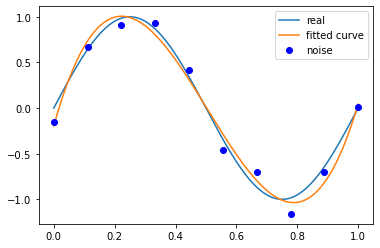

In [8]:
# M=3
p_lsq_3 = fitting(M=3)


Fitting Parameters: [-3.68369880e+04  1.59260831e+05 -2.87133111e+05  2.79933862e+05
 -1.60021316e+05  5.43799349e+04 -1.06005890e+04  1.05038895e+03
 -3.28510941e+01 -1.50913918e-01]
train loss: 3.971138716591573e-23
test loss: 0.043636211223583576


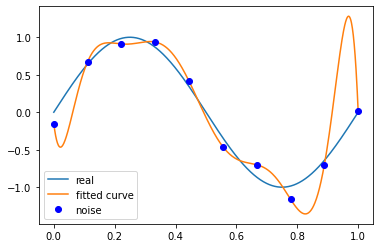

In [9]:
# M=9
p_lsq_9 = fitting(M=9)
# 误差非常小，但这真的是我们想要的模型吗？我们可以改改噪音的方差再试一试

![](img/loss.png)

## 正则化（regularization）

形式如下：
$L(x)=\sum\limits_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

- L1 范数会使参数尽可能变成0，只会留下关键参数
- L2 范数则会让所有参数都往小的变

参数越小，对特征的导数越小，曲线更平稳，异常点的扰动性越小\
同时注意我们只对权重，不对偏置进行正则化（为什么？）\
事实上对于L2正则化的权重更新可以由weight decay代替

![](img/L1L2.png)

In [10]:
regularization = 1e-4


def residuals_func_regularization_L2(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

def residuals_func_regularization_L1(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.abs(regularization * p))  # L1范数作为正则化项
    return ret

def print_picture(p_lsq, ax): #画图
    ax.plot(x_points, real_func(x_points), label='real')
    ax.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
    print('Fitting Parameters:', p_lsq[0])
    ax.plot(
        x_points,
        fit_func(p_lsq[0], x_points),
        label='regularization')
    ax.plot(x, y, 'bo', label='noise')
    ax.legend()

# 最小二乘法,加正则化项，同样是九次多项式
p_init = np.random.rand(9 + 1)

Fitting Parameters: [-3.05481010e+00 -2.16002072e+00  2.78014222e-01  3.86750225e+00
  7.15226118e+00  6.81241372e+00 -2.29903083e+00 -1.97364341e+01
  9.21083741e+00 -4.35572898e-03]


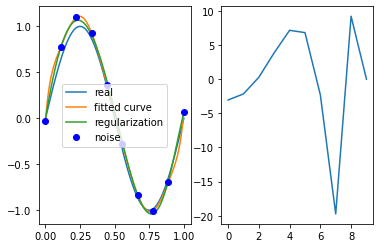

In [51]:
p_lsq_regularization = leastsq(residuals_func_regularization_L2, p_init, args=(x, y))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
print_picture(p_lsq_regularization,ax1)
ax2.plot(p_lsq_regularization[0])


Fitting Parameters: [-6.43520879e+00  1.76882366e+01 -8.09635084e+00 -2.47644798e+01
  1.05470991e+01  4.90956080e+01 -3.43865382e+01 -1.25631585e+01
  9.01175481e+00 -2.75893622e-02]


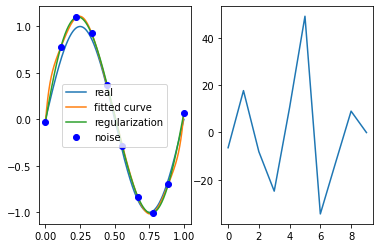

In [52]:
p_lsq_regularization2 = leastsq(residuals_func_regularization_L1, p_init, args=(x, y))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
print_picture(p_lsq_regularization2,ax1)
ax2.plot(p_lsq_regularization2[0])

## 模型分类

我们的最终目标是给定一个数据x，通过模型输出条件概率P(y|x)，可以有两种方法得到

### 生成模型


学习数据的**联合概率分布P(X,Y)**，是学习数据如何形成的一种模型。它在一定的假设条件下对数据之间的内在联系进行建模，观察数据整体分布，因此学习收敛速度更快，代表有朴素贝叶斯，隐马尔可夫模型。

### 判别模型

直接学习决策函数y=f(x)或条件概率分布P(y|x)，只在意让损失函数最小，划分一个具体的边界来区分类别。大多数模型都是判别模型，比如感知机，SVM，决策树等

## 分类问题

当输出值Y取有限个离散的取值时，就是分类问题，如果是连续的，就是回归问题。

### 如何评估分类结果

- 精确率（最常用）   精确率 = 预测正确个数/预测总个数



如果是二分类的话，还会有如下评估标准：
- TP ：将正类预测为正类
- TN ：将负类预测为负类
- FP ：将负类预测为正类
- FN ：将正类预测为负类

- 准确率（预测正类中正确的概率） <center>$P=\frac{TP}{TP+FP}$ </center>
    
  
- 召回率（真实的正类中被预测正确的概率）<center>$R=\frac{TP}{TP+FN}$</center>
    
    
- F1分数（准确率和召回率的调和平均，两者必须都很大F1分数才会大）
    
例如，地震预测会用到召回率，罪犯预测会用到准确率，不过一般分类用精度即可

## 知识补充——梯度下降法

梯度下降法是求解无约束问题最优化问题的最常用方法，原理和实现都很简单。

梯度的本意是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）上升速度最快，变化率最大。梯度的反方向则是下降速度最快
![](img/gd.png)



假设我们想要让损失函数$L(x)$最小，首先，我们需要给定初值$x^{(0)}$,之后不断朝着该点梯度负值的方向缓慢移动，最后到达**极小值**。

我们可以在$x^{(k)}$处一阶泰勒展开：
<center>$f(x)=f(x^{(k)})+\nabla f(x^{(k)})(x-x^{(k)})$</center>

假设更新$x^{(k)}$时我们选择步长参数$\lambda_k$，那么可令<center>$x^{(k+1)} = x^{(k)} - \lambda_K\nabla f(x^{(k)})$</center>

如何找到$\lambda_k$呢？一般如果损失函数比较好计算的话，我们可以搜索此次更新能让目标最小的$\lambda_k$：
<center>$f(x^{(k)}- \lambda_k\nabla f(x^{(k)})) = \min\limits_{\lambda \geq 0} f(x^{(k)}- \lambda\nabla f(x^{(k)}))$</center>

但更多情况下可以让$\lambda$保持不变或固定改变方式，一次只挪一点点，通过更多次迭代找到极小值点。

除了梯度下降法之外还有牛顿法，考虑到二阶导数，故收敛速度更快。由于应用上二阶导很难求，而且要求海塞矩阵的逆矩阵，应用并不多。一般会使用拟牛顿法代替，感兴趣的同学可自行学习了解。

## <center>感知机</center>


**定义（感知机）**　假设输入空间（特征空间）是$X \subseteq R^n$，输出空间是 Y＝{+1,-1}。输入$x \in X$表示实例的特征向量，对应于输入空间（特征空间）的点；输出$y \in Y$表示实例的类别。由输入空间到输出空间的如下函数:
<center>$f(x) = sign(w\cdot x+b)$</center>
    
称为感知机。其中，$\omega和b$为感知机模型参数，$w \in R_n$叫作权值（weight）或权值向量（weight vector），$b \in R$叫作偏置（bias），$\omega\cdot x$表示$\omega和x$的内积。sign是符号函数，即
<center>$\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.$</center>

## 几何解释

线性方程$w\cdot x+b=0$对应特征空间中一个超平面S，其中w是超平面的法向量，b是截距。\
这个超平面将特征空间划分为两个部分。位于两部分的点（特征向量）分别被分为正、负两类。因此，超平面S称为分离超平面
![](img/perceptron_explain.png)


给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$

定义感知机的损失函数 

$L(w, b)=-\sum\limits_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$

---

其中M是误分类的点的集合，显然损失函数是非负的。\
该损失函数的意义是误分类点到决策平面的距离度量（真实距离需要除以w的L2范数）

## 感知机学习算法
![](img/perceptron_algorithm.png)

随机梯度下降法 Stochastic Gradient Descent

随机抽取一个/数个误分类点使其梯度下降。

$L(w, b)=-\sum\limits_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

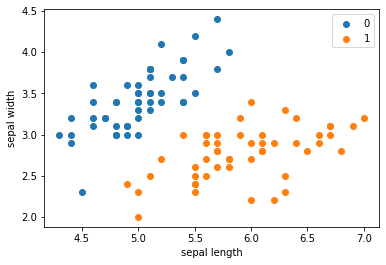

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [12]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        #self.data = data

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

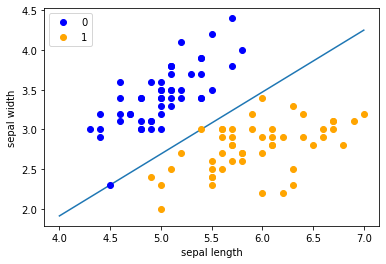

In [13]:
perceptron = Model()
perceptron.fit(X, y)

x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 实例——scikit乳腺癌预测

思考如下：

- 我偏置呢？
- loss函数收敛的速度与learning rate的关系 
- 归一化输入数据的作用
- 如何将感知机的二分类推广到多分类？


## 算法的收敛性

**Novikoff定理**：若数据集$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$是线性可分的，记$\hat\omega = (\omega^T, b)^T, \hat x = (x^T,1)^T$则
- (1) 存在满足条件$||\hat\omega_{opt}|| = 1$ 的超平面$\hat\omega_{opt}\cdot \hat x=\omega_{opt}\cdot x+b_{opt}=0$ 可以将训练数据集完全正确分开，且存在$\gamma \ge 0$,对所有的i，均有：
<center>$y_i(\hat\omega_{opt}\cdot \hat x_i) \geq \gamma$    （1）  </center>
- (2) 令$R = \max\limits_{1 \leq i \leq N}||\hat x_i||$,则感知机算法在训练集上误分类次数k满足：
<center>$k \leq (\frac{R}{\gamma})^2$</center>

## 证明

**(1)** 由于训练集线性可分，由线性可分的定义存在超平面可将训练数据集完全正确分开，取此超平面为 $\hat\omega_{opt}\cdot \hat x=0$,并使$||\hat\omega_{opt}||=1$， 那么：

<center>$y_i(\hat\omega_{opt}\cdot \hat x_i) \ge 0$</center>

取<center>$\gamma = \min\limits_i\{y_i(\hat\omega_{opt}\cdot \hat x_i)\}$</center>

这里的$x_i$即为最靠近分离平面的那个点。


**(2)** 感知机算法从$\hat\omega_0 = 0$开始，如果实例被误分类，则更新权重。假设第k次迭代时，模型目前参数是$\hat\omega_{k-1}$,误分类点是$(x_i,y_i)$,则w和b的更新是:
<center>$\omega_{k} = \omega_{k-1}+\eta y_ix_i$</center><br>
<center>$b_k = b_{k-1}+\eta y_i$</center><br>
简记为<center>$\hat\omega_{k} = \hat\omega_{k-1}+\eta y_i\hat x_i$    （2）</center>
由（1）与（2）可知：
<center>$\hat\omega_{k}\cdot\hat\omega_{opt} = \hat\omega_{k-1}\cdot\hat\omega_{opt}+\eta y_i\hat\omega_{opt}\cdot \hat x_i$</center><br>
<center>$ \geq \hat\omega_{k-1}\cdot\hat\omega_{opt}+\eta\gamma$</center><br>
这样，我们得到了第k次参数与第k-1次参数的递推不等式，我们依次递推可得：
<center>$\hat\omega_{k}\cdot\hat\omega_{opt} \geq k\eta\gamma$    （3）</center><br>
$ (注意\hat\omega_{0} = 0)$这是参数的下界。

我们继续推导参数的上界：
由<center>$\hat\omega_{k} = \hat\omega_{k-1}+\eta y_i\hat x_i$    （2）</center>
误分类点$(x_i,y_i)$满足：
<center>$y_i(\hat\omega_{opt}\cdot \hat x_i) \leq 0$</center>
我们可以得到：
<center>$||\hat\omega_{k}||^2 = ||\hat\omega_{k-1}||^2 + 2\eta y_i\hat\omega_{k-1}\cdot\hat x_i + \eta^2||\hat x_i||^2$</center><br>

<center>$\leq ||\hat\omega_{k-1}||^2 + \eta^2||\hat x_i||^2$</center><br>

<center>$\leq ||\hat\omega_{k-1}||^2 + \eta^2R^2$</center><br>

<center>$\leq k\eta^2R^2$    （4）</center>


综合（3），（4）两式
<center>$\hat\omega_{k}\cdot\hat\omega_{opt} \geq k\eta\gamma$    （3）</center><br>
<center>$||\hat\omega_{k}||^2 \leq k\eta^2R^2$    （4）</center><br>

我们可以得到:
<center>$k\eta\gamma \leq \hat\omega_{k}\cdot\hat\omega_{opt} \leq ||\hat\omega_{k}||\cdot||\hat\omega_{opt}|| \leq \sqrt{k}\eta R$</center><br>
<center>$k \leq (\frac{R}{\gamma})^2$</center>

定理表明，误分类的次数k是有上界的，经过有限次搜索可以找到将训练数据完全正确分开的分离超平面。也就是说，**当训练数据集线性可分时，感知机学习算法原始形式迭代是收敛的**。\
但感知机学习算法存在许多解，这些解既依赖于初值的选择，也依赖于迭代过程中误分类点的选择顺序。为了得到唯一的超平面，需要**对分离超平面增加约束条件**。这就是第7章将要讲述的线性支持向量机的想法。当训练集线性不可分时，感知机学习算法不收敛，迭代结果会发生震荡。

## 感知机学习算法的对偶形式

对偶形式是解对偶问题得到的，对偶形式的基本想法是，将$\omega和b$表示为实例xi和标记yi的线性组合的形式，通过求解其系数而求得w和b。\
我们知道当$\omega与b$从0开始时，每一次更新参数，
<center>$\omega_{k} = \omega_{k-1}+\eta y_ix_i$</center><br>
<center>$b_k = b_{k-1}+\eta y_i$</center><br>
若一共更新了n次,其中$(x_i,y_i)$作为误分类点更新了$n_i$次，可令$\alpha_i=n_i\eta$，$\omega和b$可表示为：
<center>$\omega = \sum\limits_{i=1}^N \alpha_iy_ix_i$</center><br>
<center>$b = \sum\limits_{i=1}^N \alpha_iy_i$</center><br>



![](img/dual_algorithm.png)

对偶形式中训练实例仅以内积的形式出现。为了方便，可以预先将训练集中实例间的内积计算出来并以矩阵的形式存储，这个矩阵就是所谓的Gram矩阵。
<center>$G=[x_i\cdot x_j]_{NxN}$</center>

# 总结

- 1．感知机是根据输入实例的特征向量$x$对其进行二类分类的线性分类模型：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

感知机模型对应于输入空间（特征空间）中的分离超平面$w \cdot x+b=0$。

- 2．感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$

损失函数对应于误分类点到分离超平面的总距离。


- 3．感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
 
- 4．当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。

## 思考题

**感知机无法拟合异或函数，怎么证明？如何解决这件事情？**
